In [2]:
import matplotlib.pylab as plt
import numpy as np
plt.style.use(["science","no-latex", "/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle"])
%config InlineBackend.figure_format = 'svg'
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
import sys
from IPython.display import display
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")

In [3]:
from LoadMultiFiles import LoadOneFileUproot
from ConcanatePreviousPrediction import GetSelectedDataframe
import seaborn as sns
import pandas as pd
fileID = 0
path_evtTruth=f"/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/myJUNOCommon/share/tag_event/root/sn_tag_{fileID}.root"
path_AP=f"/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/AfterPulsePrediction/root/TagAfterPulse_{fileID}.root"
path_PSD=f"/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/myJUNOCommon/share/PSD/root/user_PSD_{fileID}_SN.root"
path_IBD=f"/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/code/PromptDelayedSignalSelection/root_PromptDelayedSelection/IBD_{fileID}_optimized.root"
path_CC=f"/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/code/PromptDelayedSignalSelection/root_PromptDelayedSelection/CC_{fileID}_optimized.root"
path_Singles = f"/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/code/PromptDelayedSignalSelection/OptimizeIsolationCut/root/Isolation_0_IsolationCriteria_3m_1.0ms.root"
R_FV_cut = 17
df_map = GetSelectedDataframe(path_evtTruth=path_evtTruth,
                              path_IBD=path_IBD,
                              path_AP=path_AP,
                              path_PSD=path_PSD,
                              path_CC=path_CC,
                              path_Singles=path_Singles,
                              inf_from_evtType=["evtType", "R", "recE", "ratioAP", "ratioSN", "fileNo","detID", "detIDs",
                                                "recX", "recY", "recZ","TriggerTime","TriggerTimeInterval","evtID"],
                              load_isolationResult=True)
df_map

,evtType,R,recE,ratioAP,ratioSN,fileNo,detID,detIDs,recX,recY,...,TagAP,TagIBDp,TagIBDd,IBDSource,psdVal,TagPSD,TagCCp,TagCCd,CCSource,TagSingle
0,pES,6854.586489,0.195969,0.003297,0.319780,0,6,[6],-4925.322266,-2619.566650,...,0,0,0,-1,4.332481e-03,2,0,0,0,0
1,N12,15130.035355,58.678581,0.013063,0.981472,0,7,[7],-6283.850098,12852.231445,...,0,0,0,-1,9.998755e-01,1,1,0,-1,0
2,AfterPulse,586.030974,0.444959,0.582113,0.028527,0,7,[7],139.278885,-23.865454,...,1,0,0,0,5.603862e-03,2,0,0,0,0
3,AfterPulse,540.508380,0.287102,0.714500,0.000000,0,-1,[],81.301765,-534.210999,...,1,0,0,0,7.416920e-07,2,0,0,0,0
4,IBDp,12277.913790,12.297911,0.012760,0.961626,0,13,[13],4992.425293,10178.103516,...,0,1,0,-1,9.968648e-01,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18663,pES,14187.729726,0.173486,0.004525,0.338235,28,91,[91],6186.286621,2394.746094,...,0,0,0,-1,1.275571e-03,2,0,0,0,0
18664,IBDp,11950.287108,12.726572,0.013044,0.961896,28,92,[92],-7299.820801,4423.094727,...,0,1,0,-1,9.985903e-01,1,0,0,0,0
18665,IBDd,12043.002196,2.300554,0.012150,0.859468,28,92,[92],-7529.791504,4455.890137,...,0,0,1,18664,9.971751e-01,1,0,0,0,0
18666,IBDp,15591.648029,17.081907,0.012801,0.968430,28,93,[93],5044.806152,14350.795898,...,0,1,0,-1,9.998966e-01,1,0,0,0,0


## Try to find back detID in pipe up events
* len(detIDs) > 1

In [4]:
df_map_reset_index = df_map.set_index(["fileNo","detID"]).sort_index()
for index, row in df_map[ (df_map["detID"]==-1) & ( (df_map["evtType"]=="IBDd") | (df_map["evtType"]=="IBDp") | (df_map["evtType"]=="IBD") )].iterrows():
    if len(row["detIDs"]) >0:
        for detID in row["detIDs"]:
            if detID not in df_map_reset_index.loc[ row["fileNo"] ].index:
                continue
            v_evtType = list( df_map_reset_index.loc[ (row["fileNo"],detID) ]["evtType"])

            if ( ("IBDp" in v_evtType) and ("IBDd" in v_evtType) ) or ("IBD" not in "".join(v_evtType) ) :
                continue
            df_map.at[index, "detID"] = np.array( df_map.set_index(["fileNo","detID"]).loc[ (row["fileNo"],detID ) ].index.get_level_values("detID") )[0]
df_map_reset_index = df_map.set_index(["fileNo","detID"]).sort_index()

# display(df_map.loc[101])


/tmp/ipykernel_4218/1220521575.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_map.at[index, "detID"] = np.array( df_map.set_index(["fileNo","detID"]).loc[ (row["fileNo"],detID ) ].index.get_level_values("detID") )[0]
/tmp/ipykernel_4218/1220521575.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_map.at[index, "detID"] = np.array( df_map.set_index(["fileNo","detID"]).loc[ (row["fileNo"],detID ) ].index.get_level_values("detID") )[0]
/tmp/ipykernel_4218/1220521575.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_map.at[index, "detID"] = np.array( df_map.set_index(["fileNo","detID"]).loc[ (row["fileNo"],detID ) ].index.get_level_values("detID") )[0]
/tmp/ipykernel_4218/1220521575.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_map.at[index, "detID"] = np.array( df_map.set_index(["fileNo","detID"]).loc[ (row["fileNo"],detID ) ].index.get_level_value

# Trigger Time Interval Distribution

In [5]:
from PlotDetectorGeometry import GetR3_XYZ
df_map["R"] = GetR3_XYZ( df_map["recX"],df_map["recY"], df_map["recZ"] )**(1/3)/1e3
df_map["R^3"] = GetR3_XYZ( df_map["recX"],df_map["recY"], df_map["recZ"] )/1e9
df_map["TriggerTime"] /= 1e3
df_map["TriggerTimeInterval"] = np.concatenate( ([0],np.diff( df_map["TriggerTime"] )) )
df_map

,evtType,R,recE,ratioAP,ratioSN,fileNo,detID,detIDs,recX,recY,...,TagIBDp,TagIBDd,IBDSource,psdVal,TagPSD,TagCCp,TagCCd,CCSource,TagSingle,R^3
0,pES,6.854586,0.195969,0.003297,0.319780,0,6,[6],-4925.322266,-2619.566650,...,0,0,-1,4.332481e-03,2,0,0,0,0,322.065186
1,N12,15.130035,58.678581,0.013063,0.981472,0,7,[7],-6283.850098,12852.231445,...,0,0,-1,9.998755e-01,1,1,0,-1,0,3463.536977
2,AfterPulse,0.586031,0.444959,0.582113,0.028527,0,7,[7],139.278885,-23.865454,...,0,0,0,5.603862e-03,2,0,0,0,0,0.201262
3,AfterPulse,0.540508,0.287102,0.714500,0.000000,0,-1,[],81.301765,-534.210999,...,0,0,0,7.416920e-07,2,0,0,0,0,0.157909
4,IBDp,12.277914,12.297911,0.012760,0.961626,0,13,[13],4992.425293,10178.103516,...,1,0,-1,9.968648e-01,1,0,0,0,0,1850.860721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18663,pES,14.187730,0.173486,0.004525,0.338235,28,91,[91],6186.286621,2394.746094,...,0,0,-1,1.275571e-03,2,0,0,0,0,2855.871878
18664,IBDp,11.950287,12.726572,0.013044,0.961896,28,92,[92],-7299.820801,4423.094727,...,1,0,-1,9.985903e-01,1,0,0,0,0,1706.612877
18665,IBDd,12.043002,2.300554,0.012150,0.859468,28,92,[92],-7529.791504,4455.890137,...,0,1,18664,9.971751e-01,1,0,0,0,0,1746.643599
18666,IBDp,15.591648,17.081907,0.012801,0.968430,28,93,[93],5044.806152,14350.795898,...,1,0,-1,9.998966e-01,1,0,0,0,0,3790.321657


[]

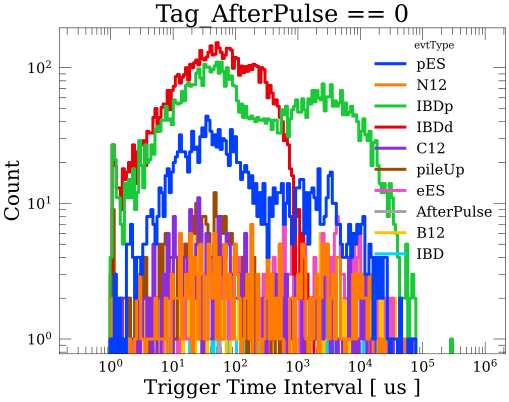

In [6]:
sns.histplot(x="TriggerTimeInterval", data=df_map[df_map["TagAP"]==0], element="step", fill=False,
             bins=np.logspace(-0.5,6, 200), hue="evtType",palette="bright")
plt.xlabel("Trigger Time Interval [ us ]")
plt.title("Tag_AfterPulse == 0")
plt.semilogx()
plt.semilogy()

## Trigger Time Distribution of Different events

[]

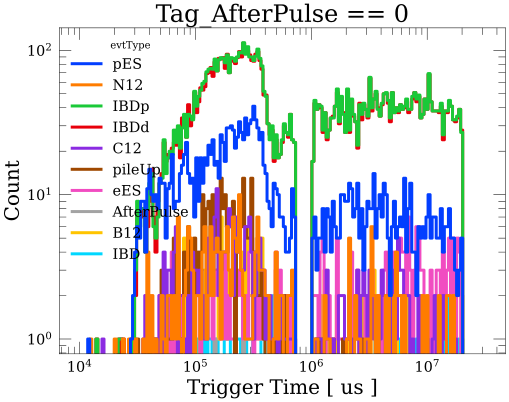

In [7]:
sns.histplot(x="TriggerTime", data=df_map[df_map["TagAP"]==0], element="step", fill=False,
             bins=np.logspace(4,7.5, 200), hue="evtType",palette="bright")
plt.xlabel("Trigger Time [ us ]")
plt.title("Tag_AfterPulse == 0")
plt.semilogx()
plt.semilogy()

## Residual Components
### 1. Energy Sepectrum

/cvmfs/juno.ihep.ac.cn/sw/anaconda/Anaconda3-2020.11-Linux-x86_64/envs/root624/lib/python3.8/site-packages/pandas/core/array_algos/replace.py:85: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  op = lambda x: operator.eq(x, b)


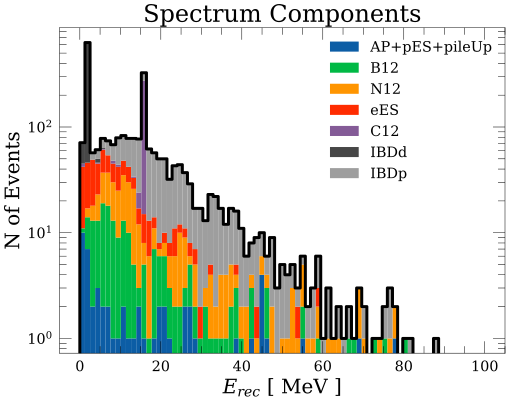

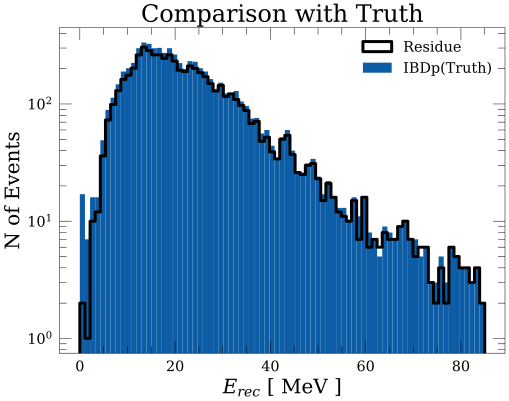

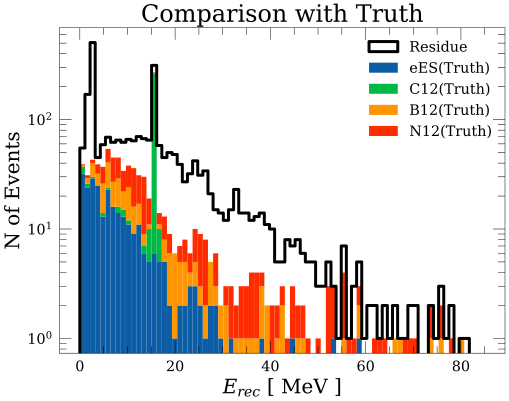

In [8]:
from importlib import reload
import PlotSpectrum
reload(PlotSpectrum)
from PlotSpectrum import PlotSpectrumComponents, CompareWithTruthSpectrum
index_residue = ( (df_map["TagAP"]==0) & (df_map["TagIBDp"]==0) &
                  (df_map["TagIBDd"]==0) & (df_map["TagPSD"]==1) )
tag_other = "AP+pES+pileUp"
PlotSpectrumComponents( df_map[index_residue].replace({"AfterPulse":tag_other, "pES":tag_other,"pileUp":tag_other,"IBD":"IBDp"}) )
plt.figure()
CompareWithTruthSpectrum(df_map[( (df_map["TagAP"]==0) & (df_map["TagIBDp"]==1) )], df_map, v_truth_to_plot=["IBDp"])

plt.figure()
CompareWithTruthSpectrum(df_map[index_residue], df_map, v_truth_to_plot=["eES", "C12", "B12", "N12"])

In [9]:
v_PSD_Tags = [2, 1]
df_map_within_FV = df_map[df_map["R"]<R_FV_cut]
v_Title = ["pES", "eES+CC+NC"]
index_notIBD = ( (df_map_within_FV["TagAP"]==0) & (df_map_within_FV["TagIBDp"]==0) & (df_map_within_FV["TagIBDd"]==0) )
df_residue_components = pd.DataFrame()
for PSD_tag, title in zip( v_PSD_Tags, v_Title ):
    df_temp = df_map_within_FV[ index_notIBD & (df_map_within_FV["TagPSD"]==PSD_tag) ].groupby("evtType").size().reset_index(name=title).set_index("evtType")
    df_temp[title] = df_temp[title]/ np.sum( df_temp[title] )
    df_residue_components = pd.concat( [df_residue_components,df_temp], axis=1)

# IBD Selection
index_IBD_event = ((df_map_within_FV["TagAP"]==0) &
                   ( (df_map_within_FV["TagIBDp"]==1) & (df_map_within_FV["TagIBDd"]==0) )  )
title="IBD"
df_temp = df_map_within_FV[ index_IBD_event ].groupby("evtType").size().reset_index(name=title).set_index("evtType")
df_temp[title] = df_temp[title]/ np.sum( df_temp[title] )
df_residue_components = pd.concat( [df_residue_components,df_temp], axis=1)

df_residue_components =  df_residue_components.fillna(0)
pd.options.display.float_format = '{:,.2f}'.format
df_residue_components*100

,pES,eES+CC+NC,IBD
evtType,,,
AfterPulse,0.18,0.16,0.00
C12,0.12,20.21,0.03
IBD,0.24,1.64,0.05
IBDd,1.07,11.87,0.03
IBDp,1.07,14.08,97.77
eES,0.48,19.07,0.02
pES,94.69,0.65,0.07
pileUp,2.15,2.54,1.97
B12,0.00,12.27,0.05


# What do missed IBDs Look like?


In [10]:
display( df_map[df_map["R"]<R_FV_cut].groupby([ "TagIBDp","TagIBDd","evtType"]).size() )

TagIBDp  TagIBDd  evtType   
0        0        AfterPulse    2343
                  B12            150
                  C12            252
                  IBD             24
                  IBDd           189
                  IBDp           206
                  N12            215
                  eES            241
                  pES           1626
                  pileUp          67
         1        B12              1
                  IBD             19
                  IBDd          5741
                  IBDp             1
                  pileUp          64
1        0        B12              3
                  C12              2
                  IBD              3
                  IBDd             2
                  IBDp          5843
                  eES              1
                  pES              4
                  pileUp         118
dtype: int64

## 1. Missed IBDd

### Missed IBD Events Distribution

Text(0.5, 1.0, 'Missed IBD')

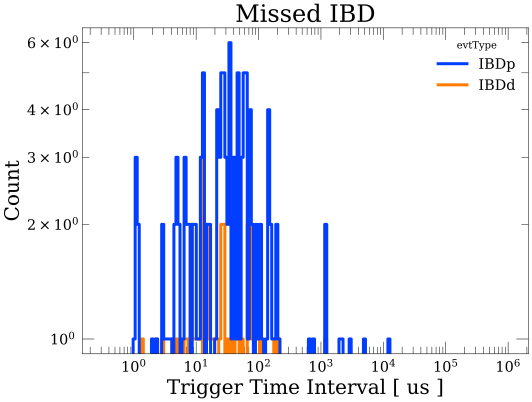

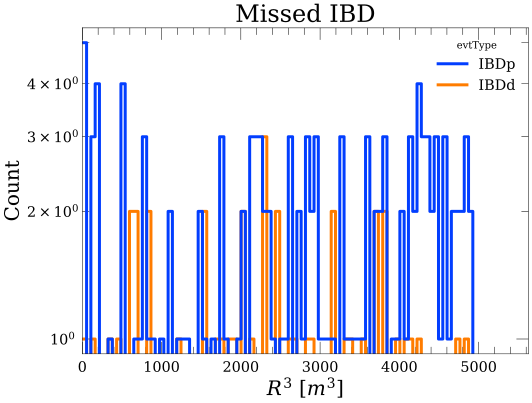

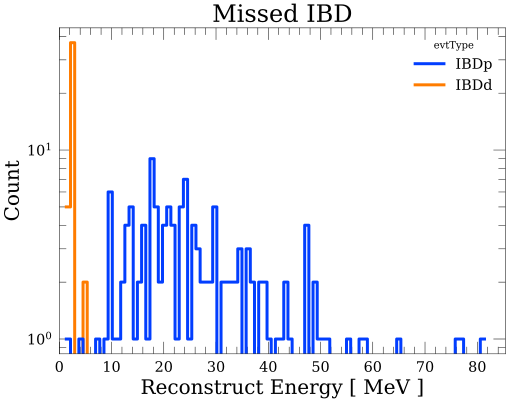

In [11]:
df_map_miss_IBD = df_map[ (df_map["TagAP"]==0) & (df_map["TagCCd"]==0) & (df_map["TagCCp"]==0) & (df_map["TagSingle"]==1)&
                          ( ( (df_map["TagIBDd"]==0) & (df_map["evtType"]=="IBDd") & (df_map["R"]<R_FV_cut)) |
                            ( (df_map["TagIBDp"]==0) & (df_map["evtType"]=="IBDp") & (df_map["R"]<R_FV_cut) ) ) ]
sns.histplot(x="TriggerTimeInterval",
             data=df_map_miss_IBD,
             element="step", fill=False,
             bins=np.logspace(-0.5,6, 200),
             hue="evtType",palette="bright")
plt.xlabel("Trigger Time Interval [ us ]")
plt.title("Missed IBD")
plt.semilogx()
plt.semilogy()

plt.figure()
sns.histplot(x="R^3",
             data=df_map_miss_IBD,
             element="step", fill=False,
             hue="evtType",palette="bright",
             bins=np.linspace(0, 5360, 100))
plt.xlim(0,)
plt.xlabel("$R^3$ [$m^3$]")
plt.title("Missed IBD")
plt.semilogy()

plt.figure()
sns.histplot(x="recE",
             data=df_map_miss_IBD,
             element="step", fill=False,
             hue="evtType",palette="bright",
             bins=100)
plt.xlim(0,)
plt.semilogy()
plt.xlabel("Reconstruct Energy [ MeV ]")
plt.title("Missed IBD")


## Truth IBD Pair

In [92]:
from collections import Counter
def Get_dR(df1, df2):
    df_dR = ( ( df1["recX"]-df2["recX"] )**2+
             ( df1["recY"]-df2["recY"] )**2+
             ( df1["recZ"]-df2["recZ"] )**2 ) ** 0.5
    return df_dR.dropna()

# Get Selection Criteria
def GetMinAndMax(df, key):
    return ( df.loc[key]['min'], df.loc[key]['max'] )
df_parameters = pd.read_xml("/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/code/PromptDelayedSignalSelection/IBDSelectionCriteria_optimized.xml",
                xpath="//condition").set_index("name")

dR_cut = GetMinAndMax(df_parameters, "distance") # mm
t_cut =  GetMinAndMax(df_parameters, "deltaT") # ns
Ed_cut = GetMinAndMax(df_parameters, "denergy")
Ep_cut = GetMinAndMax(df_parameters, "penergy")
Ed_cut2 = (4.79361066, 5.34671959)


items_interest = ["evtID","evtType", "recE","TriggerTime", "R", "TriggerTimeInterval", "TagIBDp", "TagIBDd", "IBDSource",
                  "recX", "recY"]




# plt.figure()
# sns.histplot(x="R", data=df_map[df_map["TagIBDp"]==1],bins=np.linspace(0,17.5, 100))


## Show Missed IBD Situation

,evtType,ratioSN,ratioAP,R,fileNo,detIDs,detID,TriggerTime,TagIBD,recE
evtID,,,,,,,,,,
3835,IBDp,0.97,0.01,12.15,5,[135],135,"149,351.62",TagIBDp,18.66
3836,IBDp,0.97,0.01,12.93,5,[136],136,"149,358.31",Untagged,23.66
3837,C12,0.97,0.01,10.30,5,[137],137,"149,368.95",Untagged,15.95


/cvmfs/juno.ihep.ac.cn/sw/anaconda/Anaconda3-2020.11-Linux-x86_64/envs/root624/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


,evtType,recE,ratioSN,ratioAP,R,fileNo,detIDs,detID,TriggerTime,TagIBD
evtID,,,,,,,,,,
3834,IBDp,17.91,0.97,0.01,12.80,5,[134],134,"149,304.19",TagIBDp
3835,IBDp,18.66,0.97,0.01,12.15,5,[135],135,"149,351.62",TagIBDp
3836,IBDp,23.66,0.97,0.01,12.93,5,[136],136,"149,358.31",Untagged
3837,C12,15.95,0.97,0.01,10.30,5,[137],137,"149,368.95",Untagged
3838,IBDp,57.16,0.98,0.01,14.45,5,[138],138,"149,416.22",TagIBDp
3839,AfterPulse,0.33,0.02,0.51,11.46,5,[138],138,"149,417.32",TagAP
3840,AfterPulse,0.29,0.00,0.69,0.88,5,[],-1,"149,419.49",TagAP
3841,IBDd,2.19,0.86,0.01,12.18,5,[135],135,"149,432.39",TagIBDd
3842,pileUp,21.61,0.97,0.01,15.01,5,"[136, 139]",-1,"149,479.81",TagIBDp


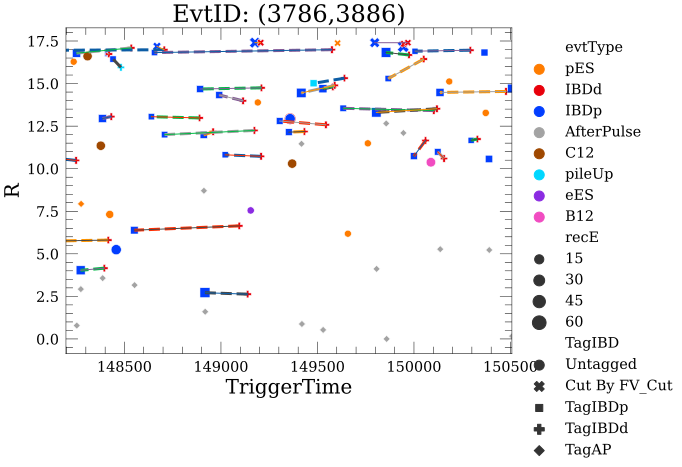

In [13]:
from importlib import reload
import DisplayIBDTimeSeries
reload(DisplayIBDTimeSeries)
from DisplayIBDTimeSeries import PlotTimeSeries
from matplotlib.backends.backend_pdf import PdfPages

# display( df_map[(df_map["TriggerTime"]>775e3)&(df_map["TriggerTime"]<780e3)][["evtID","evtType", "recE", "ratioSN", "R", "fileNo","detIDs","detID"]]\
#          .set_index("evtID").loc[1257:1357] )
focus_evtID = 3836
PlotTimeSeries(df_map, focus_evtID-50, focus_evtID+50, FV_cut=R_FV_cut,key_y_plot="R",
                 focus_evtID=focus_evtID)
display( df_map[(df_map["TriggerTime"]>149.3e3)&(df_map["TriggerTime"]<149.51e3)]
         [["evtID","evtType", "recE", "ratioSN","ratioAP", "R", "fileNo","detIDs","detID","TriggerTime", "TagIBD"]]
         .set_index("evtID") )
# for index, row in df_map[df_map["fileNo"]==3].iterrows():
#     if 56 in row["detIDs"]:
#         display(row)
    # df_map_reset_index.loc[(5, 136)]

In [14]:
# with PdfPages("/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/code/PromptDelayedSignalSelection/table.pdf") as pp:
#     for evtID in df_map_miss_IBD[(df_map_miss_IBD["detID"]!=-1) & ((df_map_miss_IBD["R"]<17)&
#                                                                    (df_map_miss_IBD["evtType"]=="IBDp"))]["evtID"].iloc[10:300:10]:
#
#         fig, fig_table = PlotTimeSeries(df_map, evtID-50,evtID+50, FV_cut=R_FV_cut,key_y_plot="R",
#                        focus_evtID=evtID,deltaT_focus_table=100)
#         plt.xlabel("Trigger Time [ us ]")
#         plt.ylabel("R [ m ]")
#         pp.savefig(fig,bbox_inches='tight' )
#         pp.savefig(fig_table, bbox_inches="tight")
#         plt.close(fig)
#         plt.close(fig_table)
#


In [15]:
display(df_map[df_map["R"]<R_FV_cut].groupby(["TagIBDp","TagIBDd","evtType"]).size().xs(1, level="TagIBDp"))
display(df_map.groupby(["TagIBDp","TagIBDd","evtType"]).size().xs(1, level="TagIBDd"))
df_map.groupby(["TagIBDp","TagIBDd","evtType"]).size()

TagIBDd  evtType
0        B12           3
         C12           2
         IBD           3
         IBDd          2
         IBDp       5843
         eES           1
         pES           4
         pileUp      118
dtype: int64

TagIBDp  evtType
0        B12           1
         IBD          20
         IBDd       5889
         IBDp          1
         pileUp       65
dtype: int64

TagIBDp  TagIBDd  evtType   
0        0        AfterPulse    2348
                  B12            160
                  C12            283
                  IBD             27
                  IBDd           671
                  IBDp           840
                  N12            247
                  eES            272
                  pES           1787
                  pileUp          81
         1        B12              1
                  IBD             20
                  IBDd          5889
                  IBDp             1
                  pileUp          65
1        0        B12              3
                  C12              2
                  IBD              3
                  IBDd             2
                  IBDp          5843
                  eES              1
                  pES              4
                  pileUp         118
dtype: int64

In [57]:
display(df_map_miss_IBD)

,evtType,R,recE,ratioAP,ratioSN,fileNo,detID,detIDs,recX,recY,...,TagIBDd,IBDSource,psdVal,TagPSD,TagCCp,TagCCd,CCSource,TagSingle,R^3,Truth_Partner
305,IBDp,16.09,76.02,0.01,0.98,0,276,[276],"-5,794.43","-14,456.38",...,0,-1,1.00,1,0,0,-1,1,"4,162.96",-1
366,IBDd,15.62,2.24,0.01,0.85,0,341,[341],"1,715.81","8,343.78",...,0,-1,1.00,1,0,0,-1,1,"3,808.81",-1
586,IBDp,16.50,34.46,0.01,0.98,1,4,[4],995.50,"-8,270.55",...,0,-1,0.98,1,0,0,-1,1,"4,492.06",-1
765,IBDd,12.12,2.24,0.01,0.86,1,132,[132],"-9,697.42","6,953.47",...,0,-1,1.00,1,0,0,-1,1,"1,781.73",-1
801,IBDd,12.43,4.98,0.01,0.92,1,133,[133],"3,955.80","-7,256.52",...,0,-1,1.00,1,0,0,-1,1,"1,920.60",-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16248,IBDp,15.50,18.91,0.01,0.97,23,420,[420],"13,718.97","-4,176.75",...,0,-1,1.00,1,0,0,-1,1,"3,721.04",-1
16342,IBDp,16.37,37.19,0.01,0.98,24,15,[15],"14,518.68","-1,287.09",...,0,-1,1.00,1,0,0,-1,1,"4,382.77",-2
16666,IBDp,16.88,26.31,0.01,0.97,24,303,[303],"-13,878.30","9,210.82",...,0,-1,0.99,1,0,0,-1,1,"4,812.38",-1
17239,IBDd,16.81,2.24,0.01,0.85,25,295,[295],"-8,917.10","8,862.37",...,0,-1,0.63,1,0,0,-1,1,"4,749.61",17238


# Why cannot select IBDp or IBDd
## Find corresponding IBD signal

In [111]:
dir_evtType_pairs = {"IBDp":"IBDd", "IBDd":"IBDp"}
v_truth_index_partner = np.ones(len(df_map_miss_IBD))*-1
# Simple Case
for i, (index, row) in enumerate(df_map_miss_IBD.iterrows()):
    for detID in row["detIDs"]:
        try:
            df_tmp = df_map_reset_index.loc[(row["fileNo"], detID)]
        except KeyError:
            pass
        df_truth_partner = df_tmp[df_tmp["evtType"]==dir_evtType_pairs[row["evtType"]]]
        if len(df_truth_partner)>0:
            if len(df_truth_partner["evtID"])==1:
                v_truth_index_partner[i] = int(df_truth_partner["evtID"])
            else:
                v_truth_index_partner[i] = -1
                # print("###############")
                # display(row)
                # display(df_truth_partner)
                # break
        elif len(df_tmp[df_tmp["evtType"]=="IBD"]):
            v_truth_index_partner[i] = int(df_tmp[df_tmp["evtType"]=="IBD"]["evtID"])
        else:
            pass

print("Before Update:\t",Counter(v_truth_index_partner==-1))
# Pile Up Case
index_not_simple = (v_truth_index_partner==-1)
num_not_simple = np.where(v_truth_index_partner==-1)[0]

display( df_map_miss_IBD[index_not_simple])
for i, (index,row) in enumerate(df_map_miss_IBD.iloc[index_not_simple].iterrows()):
    row_partner_candidate = pd.DataFrame()
    for index_to_search, row_to_search in df_map[df_map["fileNo"]==row["fileNo"]].iterrows():
        if row["detID"] in row_to_search["detIDs"] and row_to_search["evtType"] in [dir_evtType_pairs[row["evtType"]], "pileUp", "IBD"]:
            # display(pd.concat((row,row_to_search), axis=1) )
            row_partner_candidate = pd.concat((row_partner_candidate, row_to_search), axis=1)
    row_partner_candidate = row_partner_candidate.T
    if len(row_partner_candidate)==1:
        v_truth_index_partner[num_not_simple[i]] = row_partner_candidate.iloc[0]["evtID"]
    elif len(row_partner_candidate) > 1:
        row_truth_pair = row_partner_candidate[row_partner_candidate["evtType"]==dir_evtType_pairs[row["evtType"]]]
        if len(row_truth_pair)==1:
            v_truth_index_partner[num_not_simple[i]] = row_truth_pair.iloc[0]["evtID"]
        elif (len(row_truth_pair)==0) or ((len(row_truth_pair)>1) and (dir_evtType_pairs[row["evtType"]]=="IBDd") ):
            deltaE_With_2_2MeV = row_partner_candidate["recE"].apply(lambda recE : abs(recE-2.22))
            v_truth_index_partner[num_not_simple[i]] = row_partner_candidate.iloc[np.argmin(deltaE_With_2_2MeV.to_list())]["evtID"]
        else:
            deltaR_With_IBDd = row_partner_candidate["R"].apply(lambda R : abs(R-row["R"]))
            v_truth_index_partner[num_not_simple[i]] = row_partner_candidate.iloc[np.argmin(deltaR_With_IBDd.to_list())]["evtID"]

print("After Update:\t",Counter(v_truth_index_partner==-1))


Before Update:	 Counter({True: 116, False: 62})


,evtType,R,recE,ratioAP,ratioSN,fileNo,detID,detIDs,recX,recY,...,TagIBDd,IBDSource,psdVal,TagPSD,TagCCp,TagCCd,CCSource,TagSingle,R^3,Truth_Partner
305,IBDp,16.09,76.02,0.01,0.98,0,276,[276],"-5,794.43","-14,456.38",...,0,-1,1.00,1,0,0,-1,1,"4,162.96",10981
366,IBDd,15.62,2.24,0.01,0.85,0,341,[341],"1,715.81","8,343.78",...,0,-1,1.00,1,0,0,-1,1,"3,808.81",10981
586,IBDp,16.50,34.46,0.01,0.98,1,4,[4],995.50,"-8,270.55",...,0,-1,0.98,1,0,0,-1,1,"4,492.06",10981
765,IBDd,12.12,2.24,0.01,0.86,1,132,[132],"-9,697.42","6,953.47",...,0,-1,1.00,1,0,0,-1,1,"1,781.73",10981
801,IBDd,12.43,4.98,0.01,0.92,1,133,[133],"3,955.80","-7,256.52",...,0,-1,1.00,1,0,0,-1,1,"1,920.60",10981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15950,IBDp,8.04,13.27,0.01,0.96,23,167,[167],"3,297.22","-6,991.81",...,0,-1,1.00,1,0,0,-1,1,520.24,10981
16248,IBDp,15.50,18.91,0.01,0.97,23,420,[420],"13,718.97","-4,176.75",...,0,-1,1.00,1,0,0,-1,1,"3,721.04",10981
16342,IBDp,16.37,37.19,0.01,0.98,24,15,[15],"14,518.68","-1,287.09",...,0,-1,1.00,1,0,0,-1,1,"4,382.77",-2
16666,IBDp,16.88,26.31,0.01,0.97,24,303,[303],"-13,878.30","9,210.82",...,0,-1,0.99,1,0,0,-1,1,"4,812.38",10981


After Update:	 Counter({False: 161, True: 17})


In [82]:
counter_missed_IBD = Counter( df_map_miss_IBD["evtType"] )
dir_reasons_miss_IBDd = {"sum":counter_missed_IBD["IBDd"]}
dir_reasons_miss_IBDp = {"sum":counter_missed_IBD["IBDp"]}
v_known_reason = np.zeros( len(df_map_miss_IBD) )

## 1. Missed IBDp because of IBDd not captured

In [83]:
# print(Counter(v_truth_index_partner==-1) )
# display(df_map_miss_IBD[(v_truth_index_partner==-1) & (df_map_miss_IBD["evtType"]=="IBDp")])
index_missed_IBDd = (v_truth_index_partner==-1) & (df_map_miss_IBD["evtType"]=="IBDp")
v_known_reason[index_missed_IBDd] = 1
n_Uncapture_neutron = len(df_map_miss_IBD[index_missed_IBDd])
print("Not captured IBDd:\t", n_Uncapture_neutron)
print("Ratio(Not capture):\t", n_Uncapture_neutron/len(df_map[df_map["evtType"]=="IBDd"]))
dir_reasons_miss_IBDp["UnCapture IBDd"]=n_Uncapture_neutron

display(df_map_miss_IBD[index_missed_IBDd])
df_map_miss_IBD[index_missed_IBDd].to_pickle("MissedIBDdinIBDp.pkl")

# np.savez("MissedIBDdinIBDp.npz", fileNo=np.array(df_map_miss_IBD[index_missed_IBDd]["fileNo"]), detID=np.array(df_map_miss_IBD[index_missed_IBDd]["detID"])

Not captured IBDd:	 0
Ratio(Not capture):	 0.0


,evtType,R,recE,ratioAP,ratioSN,fileNo,detID,detIDs,recX,recY,...,TagIBDd,IBDSource,psdVal,TagPSD,TagCCp,TagCCd,CCSource,TagSingle,R^3,Truth_Partner


###  Check whether truly miss IBDd

In [84]:
display( df_map_miss_IBD[index_missed_IBDd])
for index,row in df_map_miss_IBD[index_missed_IBDd].iterrows():
    for index_to_search, row_to_search in df_map[df_map["fileNo"]==row["fileNo"]].iterrows():
        if row["detID"] in row_to_search["detIDs"] and row_to_search["evtType"] in ["IBDd", "pileUp", "IBD"]:
            display(pd.concat((row,row_to_search), axis=1) )
    # break



,evtType,R,recE,ratioAP,ratioSN,fileNo,detID,detIDs,recX,recY,...,TagIBDd,IBDSource,psdVal,TagPSD,TagCCp,TagCCd,CCSource,TagSingle,R^3,Truth_Partner


## 2. Cannot find IBDp truth of IBDd

In [85]:
index = (v_truth_index_partner==-1) & (df_map_miss_IBD["evtType"]=="IBDd")
v_known_reason[index] = 1
n_missed_IBDp_for_IBDp = len(df_map_miss_IBD[index])
print("Cannot find IBDp:\t",n_missed_IBDp_for_IBDp)
print("Ratio(Cannot find IBDp):\t",n_missed_IBDp_for_IBDp/len(df_map[df_map["evtType"]=="IBDd"]))
dir_reasons_miss_IBDd["No IBDp in Truth"] = n_missed_IBDp_for_IBDp

Cannot find IBDp:	 0
Ratio(Cannot find IBDp):	 0.0


## 3. Miss IBDd because of IBDp cut by FV

In [131]:
df_map_miss_IBD["Truth_Partner"] = np.array(v_truth_index_partner,dtype=int)
v_index = np.array(v_truth_index_partner[v_truth_index_partner>0],dtype=int)
n_IBDp_cut_by_FV = 0
index = (df_map_miss_IBD["evtType"]=="IBDd")
num_index = np.where(index)[0]
for i_partner, index in zip(df_map_miss_IBD[index]["Truth_Partner"],num_index):
    if i_partner<0:
        continue
    if df_map.loc[i_partner]["R"] >R_FV_cut:
        v_known_reason[index] = 1
        n_IBDp_cut_by_FV +=1
print("IBDp cut by FV:\t",n_IBDp_cut_by_FV)
print("Ratio (IBDp cut by FV):\t", n_IBDp_cut_by_FV/len(df_map[df_map["evtType"]=="IBDd"]))
dir_reasons_miss_IBDd["IBDd cut by FV cut"] = n_IBDp_cut_by_FV

IBDp cut by FV:	 7
Ratio (IBDp cut by FV):	 0.0010667479427003963


## 4. Miss IBDp because of IBDd not in Ed_cut

In [87]:
n_IBDd_not_in_Ed_cut = 0
index = (df_map_miss_IBD["evtType"]=="IBDp")
num_index = np.where(index)[0]
for i_partner, index in zip(df_map_miss_IBD[index]["Truth_Partner"], num_index):
    if i_partner<0:
        continue
    in_Ed_cut = (Ed_cut[0]<df_map.loc[i_partner]["recE"]<Ed_cut[1]) or (Ed_cut2[0]<df_map.loc[i_partner]["recE"]<Ed_cut2[1])
    if not in_Ed_cut:
        v_known_reason[index] = 1
        n_IBDd_not_in_Ed_cut +=1
print("IBDd not in Ed_cut:\t", n_IBDd_not_in_Ed_cut)
dir_reasons_miss_IBDp["IBDd not in Ed_cut"] = n_IBDd_not_in_Ed_cut

IBDd not in Ed_cut:	 111


## 5. Miss IBDp because of pairs not in dR cut

In [88]:
n_IBDd_not_in_dR_cut = 0
v_dR_not_in_dR_cut = []
v_ratioAP_IBDp = []
v_ratioAP_IBDd = []
index = (df_map_miss_IBD["evtType"]=="IBDp")
num_index = np.where(index)[0]
for i_index, row in df_map_miss_IBD[index].iterrows():
    i = row["Truth_Partner"]
    if i<0:
        continue
    dR = ( (df_map.loc[i]["recX"]-row["recX"])**2+
                             (df_map.loc[i]["recY"]-row["recY"])**2+
                             (df_map.loc[i]["recY"]-row["recY"])**2 )**0.5
    in_dR_cut = (dR_cut[0]< dR <dR_cut[1])
    if not in_dR_cut:
        n_IBDd_not_in_dR_cut +=1
        v_dR_not_in_dR_cut.append(dR)
        v_ratioAP_IBDp.append(row["ratioAP"])
        v_ratioAP_IBDd.append(df_map.loc[i]["ratioAP"])
dir_reasons_miss_IBDp["IBDd Not in dR_cut"] = n_IBDd_not_in_dR_cut
# print(n_IBDd_not_in_dR_cut, dR_cut,min(v_dR_not_in_dR_cut))
# plt.hist(v_dR_not_in_dR_cut,bins=100)
# plt.figure()
# plt.hist2d(v_ratioAP_IBDd, v_ratioAP_IBDp,cmap="Blues")
# plt.colorbar()

## 6. IBDd not in dt_cut

In [89]:
n_IBDd_not_in_dt_cut = 0
for index, row in df_map_miss_IBD[df_map_miss_IBD["evtType"]=="IBDp"].iterrows():
    print(index)
    i = row["Truth_Partner"]
    if i<0:
        continue
    dt = (df_map.loc[i]["TriggerTime"]-row["TriggerTime"])*1e3
    in_dt_cut = (t_cut[0]< dt <t_cut[1])
    if not in_dt_cut:
        n_IBDd_not_in_dt_cut +=1
        # if dt<0:
        #     display(row)
        #     display(df_map.loc[i])

dir_reasons_miss_IBDp["Not in dt cut"] = n_IBDd_not_in_dt_cut


305
586
804
810
862
891
1307
1360
1370
1395
1460
1494
1697
1835
1858
2134
2156
2319
2383
2396
2419
2442
2550
2665
2747
2769
2775
3039
3041
3117
3228
3499
3517
3530
3533
3583
3682
3692
3805
3836
3970
4107
4131
4358
4395
4401
4462
4472
4506
4541
4565
4593
4609
4711
4835
4979
5027
5100
5113
5208
5296
5327
5339
5341
5410
5415
5446
5567
5608
5665
5749
5780
5842
5869
6076
6143
6156
6157
6172
6376
6557
6638
6664
6677
6775
6828
6837
6856
6921
6929
7139
7144
7148
7162
7280
7339
7363
7372
7478
7506
7603
7639
7842
7942
8264
8349
8478
8556
8723
8810
8833
8920
8941
9025
9101
9208
9408
9474
9534
9753
10017
10237
10294
10735
10906
10976
11055
11684
15950
16103
16248
16342
16666
17772


## 7. Outside dR and dt Cut

Index(['evtType', 'R', 'recE', 'ratioAP', 'ratioSN', 'fileNo', 'detID',
       'detIDs', 'recX', 'recY', 'recZ', 'TriggerTime', 'TriggerTimeInterval',
       'evtID', 'TagAP', 'TagIBDp', 'TagIBDd', 'IBDSource', 'psdVal', 'TagPSD',
       'TagCCp', 'TagCCd', 'CCSource', 'TagSingle', 'R^3', 'TagIBD'],
      dtype='object')

,evtID,evtType,recE,TriggerTime,R,TriggerTimeInterval,TagIBDp,TagIBDd,IBDSource,recX,recY
305,305,IBDp,76.02,"42,886.60",16.09,6.87,0,0,-1,"-5,794.43","-14,456.38"
366,366,IBDd,2.24,"46,919.92",15.62,204.32,0,0,-1,"1,715.81","8,343.78"
586,586,IBDp,34.46,"54,870.83",16.50,43.75,0,0,-1,995.50,"-8,270.55"
765,765,IBDd,2.24,"61,630.81",12.12,6.89,0,0,-1,"-9,697.42","6,953.47"
801,801,IBDd,4.98,"62,565.33",12.43,16.86,0,0,-1,"3,955.80","-7,256.52"
...,...,...,...,...,...,...,...,...,...,...,...
11684,11684,IBDp,13.61,"1,126,245.33",5.65,214.58,0,0,-1,"2,393.16","5,087.10"
14081,14081,IBDd,2.21,"3,190,093.89",11.53,105.17,0,0,-1,"8,619.37","-1,961.15"
16103,16103,IBDp,29.58,"6,777,889.73",16.73,"2,056.19",0,0,-1,"-10,376.95","6,502.40"
16342,16342,IBDp,37.19,"7,475,984.05",16.37,"1,193.96",0,0,-1,"14,518.68","-1,287.09"


,evtID,evtType,recE,TriggerTime,R,TriggerTimeInterval,TagIBDp,TagIBDd,IBDSource,recX,recY
0,310,pileUp,4.64,"42,935.67",8.12,15.51,0,0,-1,"-2,122.75","-6,553.16"
1,359,pileUp,62.93,"46,559.46",16.54,99.22,1,0,-1,"-1,201.47","-14,678.36"
2,596,IBDd,0.31,"55,035.13",0.68,1.11,0,0,0,122.84,-191.34
3,762,pileUp,68.94,"61,620.72",7.49,43.21,0,0,-1,"-5,814.49","4,454.14"
4,762,pileUp,68.94,"61,620.72",7.49,43.21,0,0,-1,"-5,814.49","4,454.14"
...,...,...,...,...,...,...,...,...,...,...,...
156,11689,pileUp,12.94,"1,126,602.45",11.01,31.25,1,0,-1,"-9,380.94","-4,694.02"
157,14079,IBDp,58.74,"3,189,987.59",17.28,413.73,0,0,-1,"13,768.99","-3,161.07"
158,16105,IBDd,1.86,"6,777,993.17",17.36,102.35,0,0,-1,"-11,029.84","6,808.18"
159,16344,IBDd,1.68,"7,475,986.27",13.37,1.13,0,0,0,"12,067.83",-994.60


Counter({False: 157, True: 4})

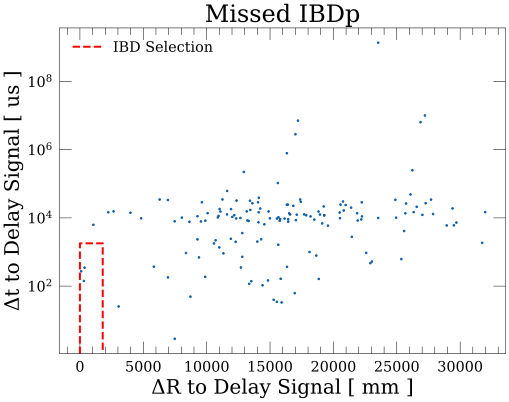

In [134]:
v_cut_line_dt = np.array([t_cut[0], t_cut[0], t_cut[1], t_cut[1], t_cut[0]])/1000
v_cut_line_dR = np.array([dR_cut[0], dR_cut[1], dR_cut[1], dR_cut[0], dR_cut[0]])

display(df_map.columns)
df_map_miss_IBD_partner = df_map.set_index("evtID").loc[v_truth_index_partner[v_truth_index_partner!=-1]].reset_index()
display(df_map_miss_IBD[v_truth_index_partner!=-1][items_interest])
display(df_map_miss_IBD_partner[items_interest])
dT_missed_IBDp = ( df_map_miss_IBD_partner["TriggerTime"]-df_map_miss_IBD.reset_index()["TriggerTime"] ).dropna()
dR_missed_IBDp = Get_dR(df_map_miss_IBD_partner, df_map_miss_IBD.reset_index())
plt.plot(v_cut_line_dR, v_cut_line_dt, color="r", linewidth=2, ls="--", label="IBD Selection")
plt.scatter( dR_missed_IBDp, dT_missed_IBDp,s=3)
plt.xlabel("$\Delta$R to Delay Signal [ mm ]")
plt.ylabel("$\Delta$t to Delay Signal [ us ]")
plt.title("Missed IBDp")
plt.legend()
plt.semilogy()

Counter( ((dR_missed_IBDp<dR_cut[1]) & (dT_missed_IBDp<t_cut[1])) )
#
# plt.figure()
# dT_missed_IBDd = -( df_map_IBDp_group_by_fileNo["TriggerTime"]-df_map_IBDd_missed["TriggerTime"] ).dropna()
# dR_missed_IBDd = Get_dR(df_map_IBDp_group_by_fileNo, df_map_IBDd_missed)
# plt.plot(v_cut_line_dR, v_cut_line_dt, color="r", linewidth=2, ls="--",label="IBD Selection")
# plt.scatter( dR_missed_IBDd, dT_missed_IBDd,s=3)
# plt.xlabel("$\Delta$R from Prompt Signal [ mm ]")
# plt.ylabel("$\Delta$t from Prompt Signal [ us ]")
# plt.title("Missed IBDd")
# plt.legend()

In [90]:
dir_reasons_miss_IBDd["Further Study"] = 2*dir_reasons_miss_IBDd["sum"]-sum(dir_reasons_miss_IBDd.values())
dir_reasons_miss_IBDp["Further Study"] = 2*dir_reasons_miss_IBDp["sum"]-sum(dir_reasons_miss_IBDp.values())
df_reasons_miss_IBDd = pd.DataFrame.from_dict(dir_reasons_miss_IBDd,orient="index", columns=["IBDd"])
df_reasons_miss_IBDp = pd.DataFrame.from_dict(dir_reasons_miss_IBDp,orient="index", columns=["IBDp"])
display(df_reasons_miss_IBDd)
display(df_reasons_miss_IBDp)

,IBDd
sum,44
No IBDp in Truth,0
IBDd cut by FV cut,5
Further Study,39


,IBDp
sum,134
UnCapture IBDd,0
IBDd not in Ed_cut,111
IBDd Not in dR_cut,112
Not in dt cut,93
Further Study,-182
